# Support Vector Classification with sklearn

Credits: https://github.com/ksopyla/svm_mnist_digit_classification

In [ ]:
# standard imports
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
%matplotlib inline

# import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
# fetch original mnist dataset
from sklearn.datasets import fetch_mldata

# import custom module
from mnist_helpers import *

In [ ]:
# load data

# fetch mnist data
mnist = fetch_mldata('MNIST original', data_home='./')

# mnist object contains: data, COL_NAMES, DESCR, target fields
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

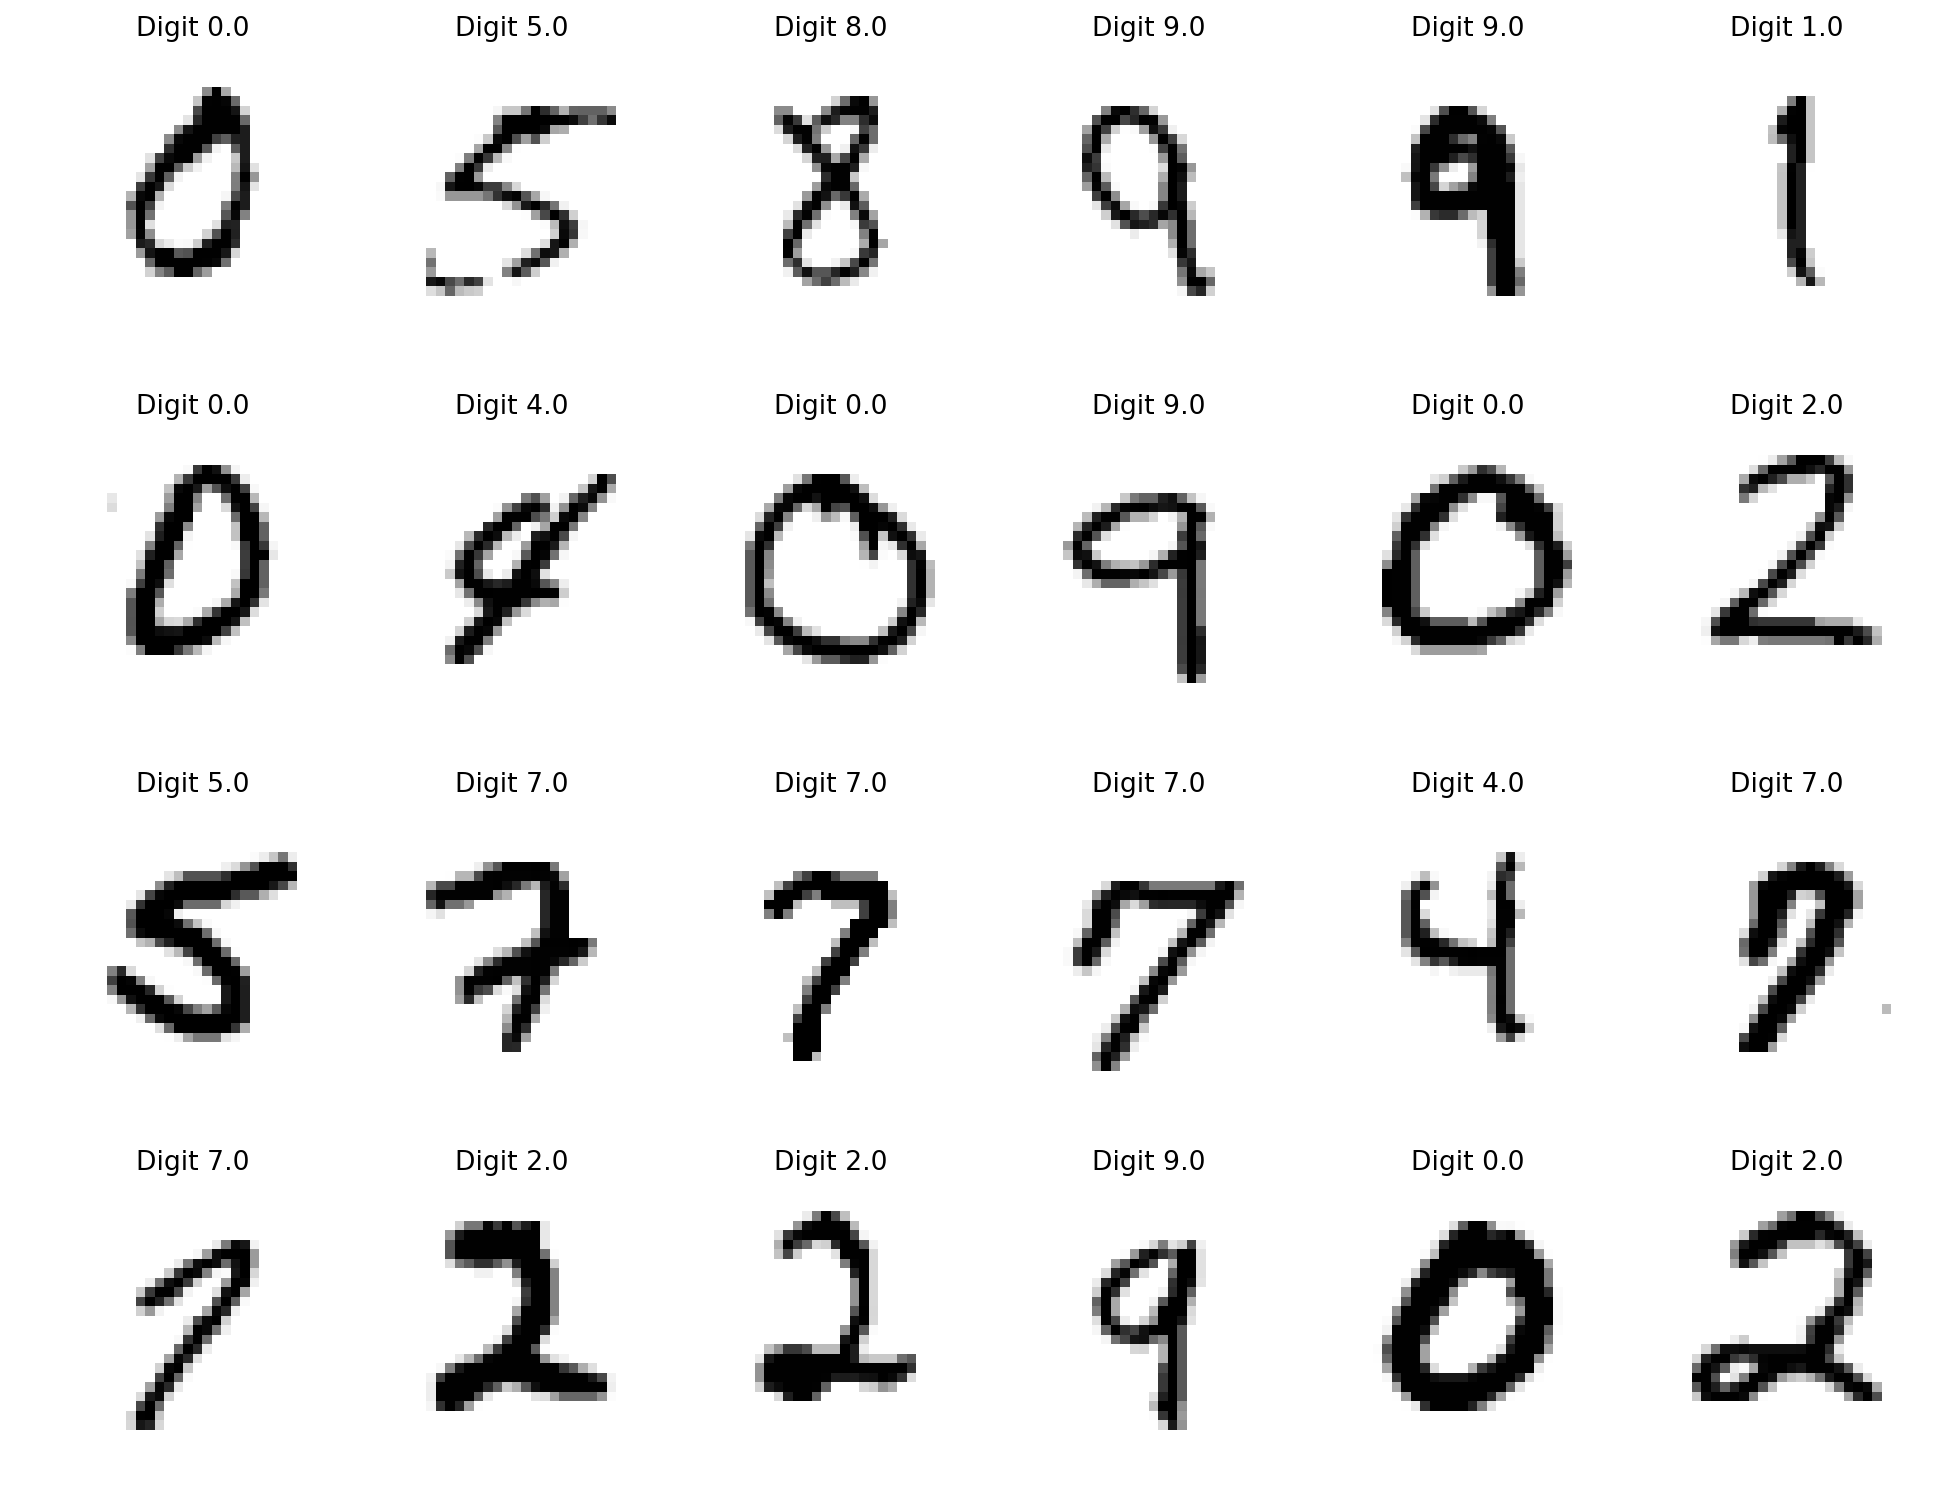

In [ ]:
# split data into image and targets

# data field is 70k x 784 array, each row represents pixels from 28x28=784 image
images = mnist.data
targets = mnist.target

# Let's have a look at the random 16 images, 
# We have to reshape each data row, from flat array of 784 int to 28x28 2D array

#pick  random indexes from 0 to size of our dataset
show_some_digits(images,targets)

In [ ]:
#full dataset classification
# normalise x values
X_data = images/255.0
# set y as the targets
Y = targets

#split data to train and test
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)

In [ ]:
# create a support vector classifier, and train it

# set params to pre-determined optimal values
param_C = 5
param_gamma = 0.05

# create clasifier according to params
classifier = svm.SVC(C=param_C,gamma=param_gamma)

# we learn the digits on train part
# start timing
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

# train our SVM
classifier.fit(X_train, y_train)

# stop timing, print elapsed
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2017-06-28 13:02:00.341095
Stop learning 2017-06-28 13:30:34.117754
Elapsed learning 0:28:33.776659


Classification report for classifier SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1024
        1.0       0.99      0.99      0.99      1185
        2.0       0.98      0.99      0.98      1051
        3.0       0.98      0.98      0.98      1057
        4.0       0.99      0.99      0.99       964
        5.0       0.98      0.98      0.98       964
        6.0       0.99      0.99      0.99      1085
        7.0       0.99      0.98      0.99      1128
        8.0       0.97      0.98      0.97      1037
        9.0       0.98      0.97      0.98      1005

avg / total       0.99      0.99      0.99     10500


Confusion matrix:
[[1014    0    2    0    0    2    2    0    1    3]
 [   0 1177    2    1    1    0

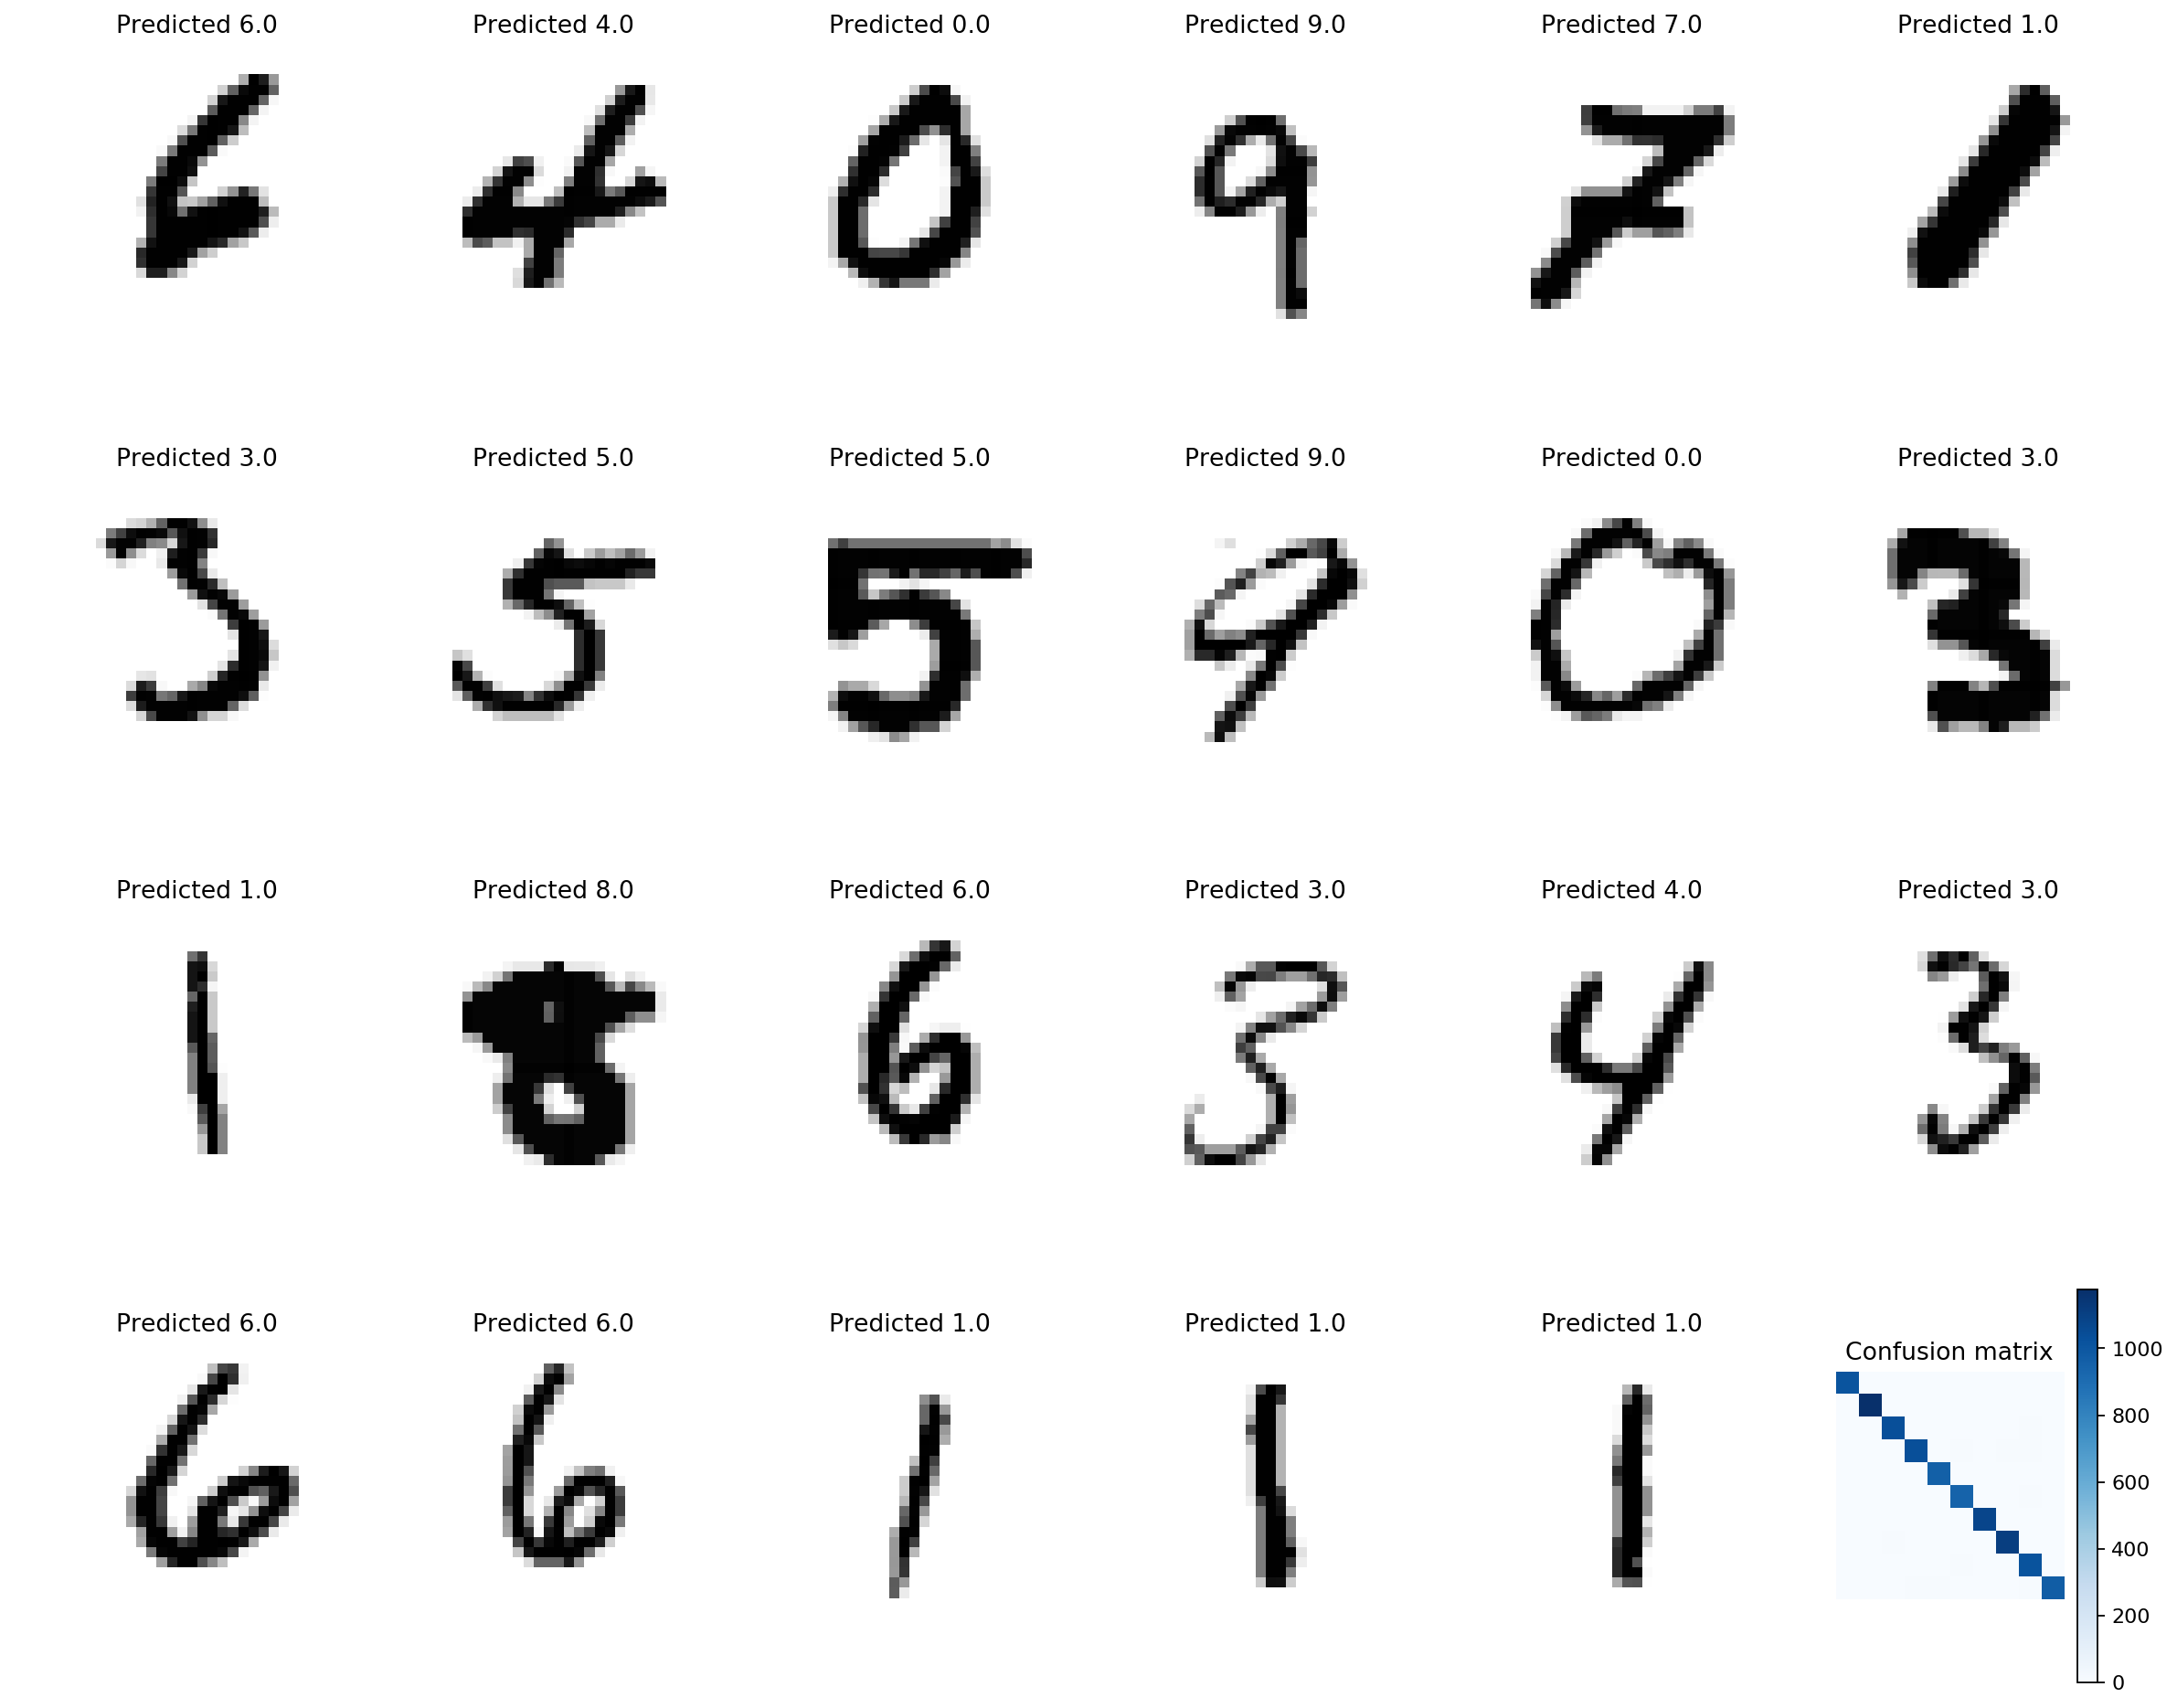

In [ ]:
# now predict the value of the test

# get actual y values
expected = y_test
# predicted y values based on x values using SVM model
predicted = classifier.predict(X_test)

# show a few digits and the predictions
show_some_digits(X_test,predicted,title_text="Predicted {}")


# print metrics
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

plot_confusion_matrix(cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))